# TENSORFLOW

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.1'

In [2]:
keras.__version__

'2.4.0'

### import and split

In [34]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [35]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [36]:
print(X_train_full.dtype)
print(y_train_full.shape)
print(y_test.shape)

uint8
(60000,)
(10000,)


### validation set (scales)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### labels

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]


'Coat'

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

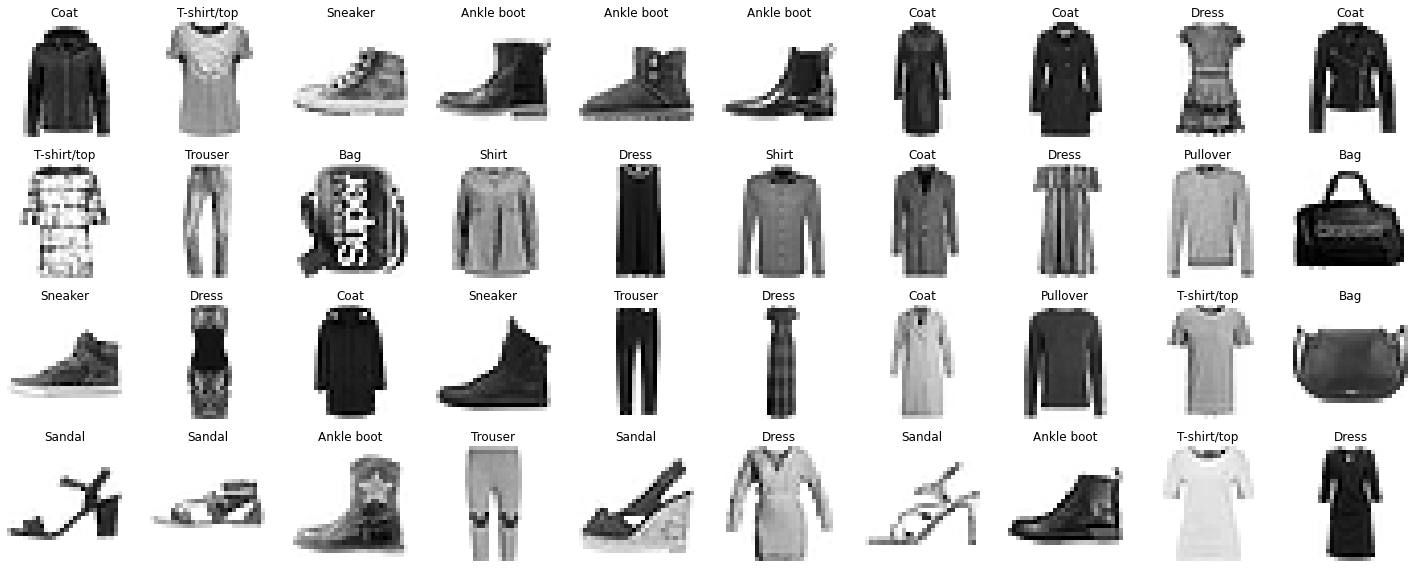

In [9]:
import numpy as np

# specify the number of rows and columns you want to see
num_row = 4
num_col = 10

# get a segment of the dataset
num = num_row * num_col
images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i % num_col]
    ax.imshow(images[i], cmap='binary')
    ax.set_title(np.array(class_names)[labels[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')

plt.tight_layout()
plt.show()


### creating the model using the Sequential API

In [10]:
model = keras.models.Sequential([
    # keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]

model.get_layer('dense') is hidden1


True

In [13]:
weights, biases = hidden1.get_weights()
weights


array([[-0.02038154, -0.0687236 , -0.01212549, ..., -0.00027022,
        -0.04395575,  0.03910355],
       [-0.01184633, -0.00635528,  0.01797731, ...,  0.05621479,
         0.03099293, -0.00835724],
       [-0.05801967,  0.01502192,  0.02600841, ..., -0.05515435,
        -0.0008349 ,  0.02230681],
       ...,
       [ 0.04246037, -0.04406193,  0.01405025, ..., -0.06533845,
        -0.0043241 , -0.01331309],
       [-0.02555876, -0.06235358, -0.04701821, ..., -0.05471449,
         0.04312844, -0.06089572],
       [-0.03286943,  0.07270887, -0.00111841, ...,  0.05769594,
        -0.06783837, -0.04889906]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape


(300,)

### Compiling the model

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              # optimizer="sgd", 
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])


### Training and evaluating the model

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.5173 - accuracy: 0.8222 - val_loss: 0.4711 - val_accuracy: 0.8372
Epoch 2/30
1719/1719 [==============================] - 25s 14ms/step - loss: 0.4566 - accuracy: 0.8398 - val_loss: 0.4109 - val_accuracy: 0.8594
Epoch 3/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4223 - accuracy: 0.8509 - val_loss: 0.4277 - val_accuracy: 0.8448
Epoch 4/30
1719/1719 [==============================] - 35s 20ms/step - loss: 0.4005 - accuracy: 0.8578 - val_loss: 0.4317 - val_accuracy: 0.8396
Epoch 5/30
1719/1719 [==============================] - 40s 23ms/step - loss: 0.3835 - accuracy: 0.8649 - val_loss: 0.3782 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 55s 32ms/step - loss: 0.3687 - accuracy: 0.8695 - val_loss: 0.3838 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 61s 35ms/step - loss: 0.3569 - accuracy: 0.8730 - val_loss: 0.3683 -

### Learning curves

In [23]:
history

In [25]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.517262,0.822164,0.471092,0.8372
1,0.456631,0.839782,0.410866,0.8594
2,0.422336,0.850873,0.427697,0.8448
3,0.400510,0.857782,0.431651,0.8396
4,0.383528,0.864909,0.378151,0.8666


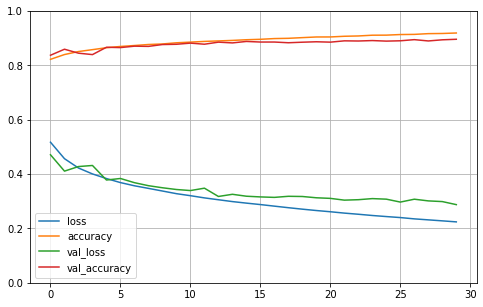

In [26]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

### test

In [39]:
model.evaluate(X_test, y_test)
X_test.shape

313/313 [==============================] - 3s 10ms/step - loss: 63.5155 - accuracy: 0.8477


(10000, 28, 28)

### predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_label = np.array(class_names)[y_pred]

y_label

/home/ange/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

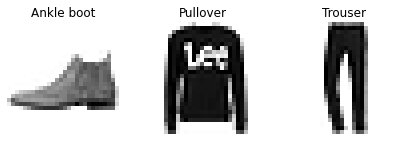

In [30]:
# specify the number of rows and columns you want to see
num_row = 1
num_col = 3

# get a segment of the dataset
num = num_row * num_col
images = X_new[:num]
labels = y_label[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(num):
    ax = axes[i]
    ax.imshow(images[i], cmap='binary')
    ax.set_title(labels[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')

plt.tight_layout()
plt.show()